# Fake News Detection

#Downloading the DataSet

In [ ]:
!pwd
!ls -l -r
!pip install tabulate


/content
total 8
drwxr-xr-x 1 root root 4096 Sep 25 18:24 sample_data
drwxr-xr-x 6 root root 4096 Sep 27 23:10 LIAR2


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 17.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.6 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.


In [ ]:
!git clone https://github.com/chengxuphd/LIAR2

Cloning into 'LIAR2'...
remote: Enumerating objects: 91, done.
remote: Counting objects: 100% (91/91), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 91 (delta 53), reused 77 (delta 47), pack-reused 0 (from 0)
Receiving objects: 100% (91/91), 7.79 MiB | 14.96 MiB/s, done.
Resolving deltas: 100% (53/53), done.


#Imports Go Here

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from tabulate import tabulate


# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# For handling text data
from sklearn.feature_extraction.text import TfidfVectorizer


# For displaying images
from sklearn.tree import export_graphviz
from subprocess import call

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')


import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Machine learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Word Embeddings
from gensim.models import Word2Vec

# For handling sparse matrices
from scipy.sparse import hstack

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')




#Loading the Test Train and Validate Data from the Dataset

In [ ]:
train_df = pd.read_csv('LIAR2/liar2/train.csv', encoding='utf-8', delimiter=',')
val_df = pd.read_csv('LIAR2/liar2/valid.csv', encoding='utf-8', delimiter=',')
test_df = pd.read_csv('LIAR2/liar2/test.csv', encoding='utf-8', delimiter=',')

First 5 Rows:


,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."



Data Types:


,Data Type
id,int64
label,int64
statement,object
date,object
subject,object
speaker,object
speaker_description,object
state_info,object
true_counts,int64
mostly_true_counts,int64



Summary Statistics:


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,22962.0,NaN,NaN,NaN,11678.31,6718.71,0.0,5872.25,11694.5,17490.75,23373.0
label,22962.0,NaN,NaN,NaN,2.25,1.59,0.0,1.0,2.0,4.0,5.0
statement,22962,22928,Says Jeff Stone = Scott Walker.,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,22962,5160,"November 4, 2020",30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
subject,22755,7126,facebook fact-checks,940,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speaker,22962,4661,facebook posts,2339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
speaker_description,22952,4640,Posters on Facebook and other social media net...,2339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state_info,17321,25,national,6102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
true_counts,22962.0,NaN,NaN,NaN,12.15,22.41,0.0,0.0,3.0,17.0,124.0
mostly_true_counts,22962.0,NaN,NaN,NaN,20.44,33.4,0.0,1.0,4.0,24.0,165.0



Missing Values:


,Missing Values
subject,207
speaker_description,10
state_info,5641
context,154


First 5 Rows:
+----+-------+---------+----------------------------------------------------------------------------------------------------------------------------+------------------+----------------------------------------------------------------------+----------------+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

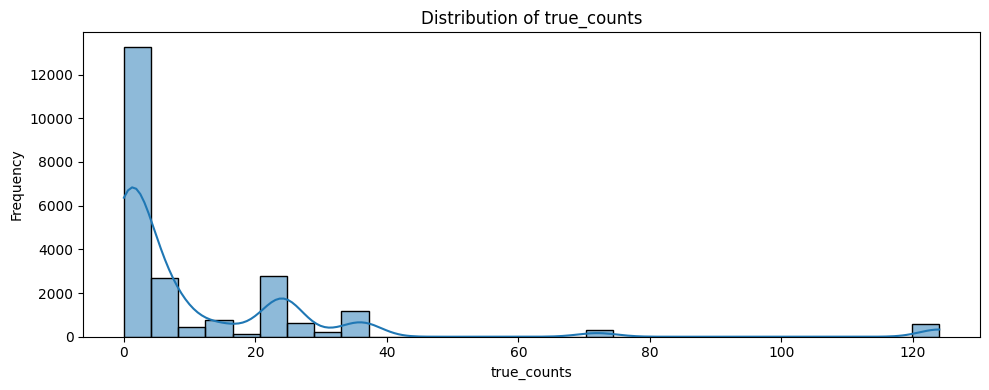

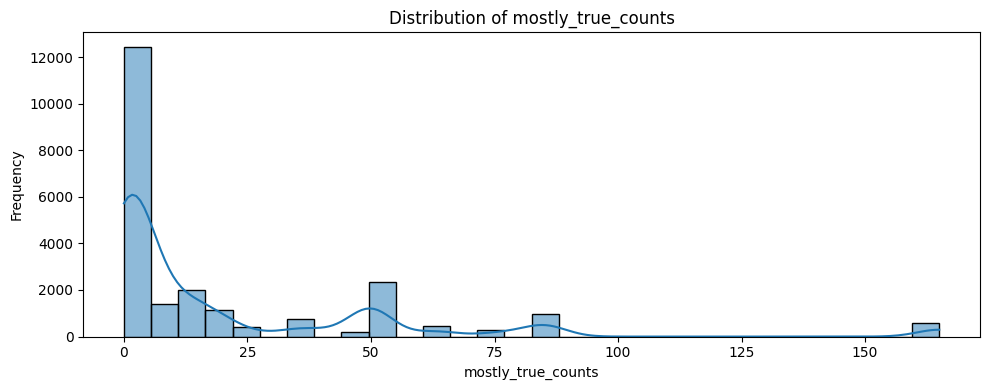

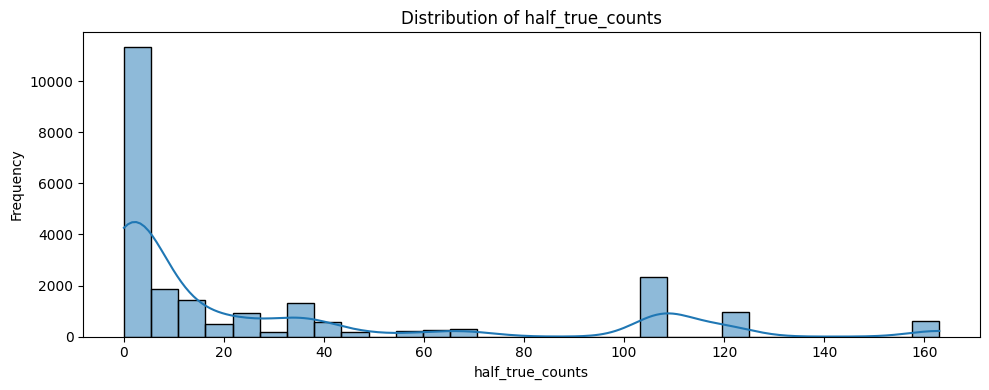

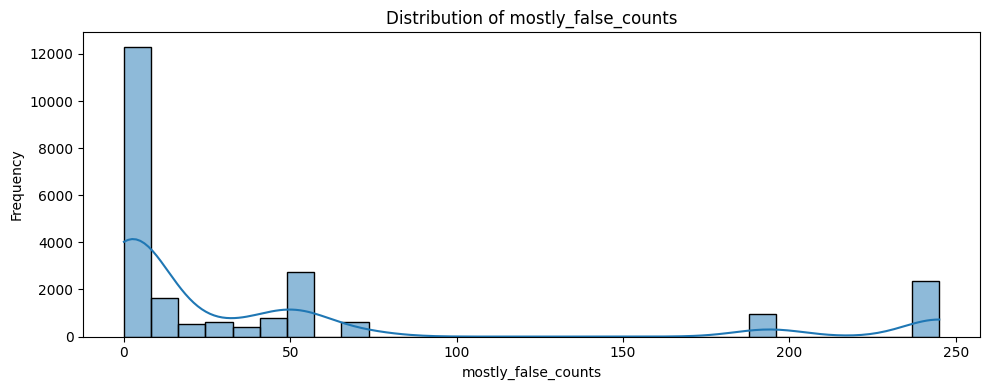

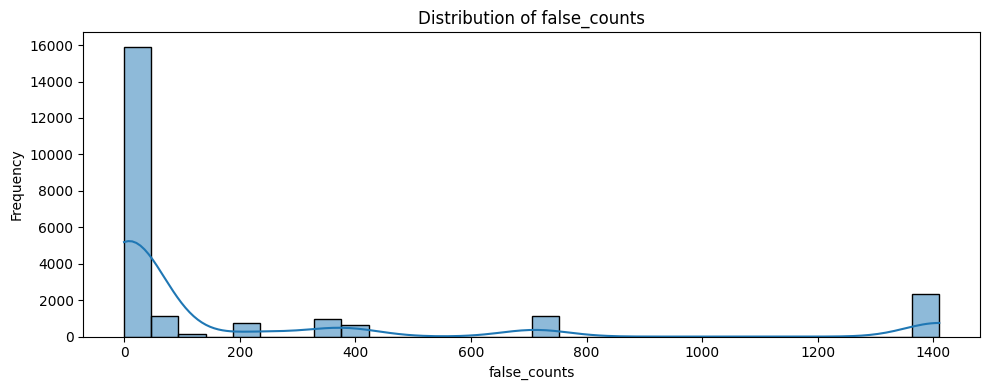

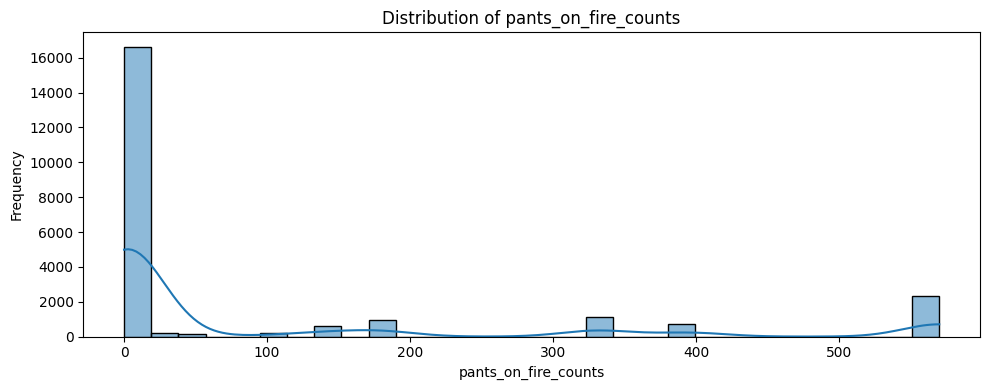

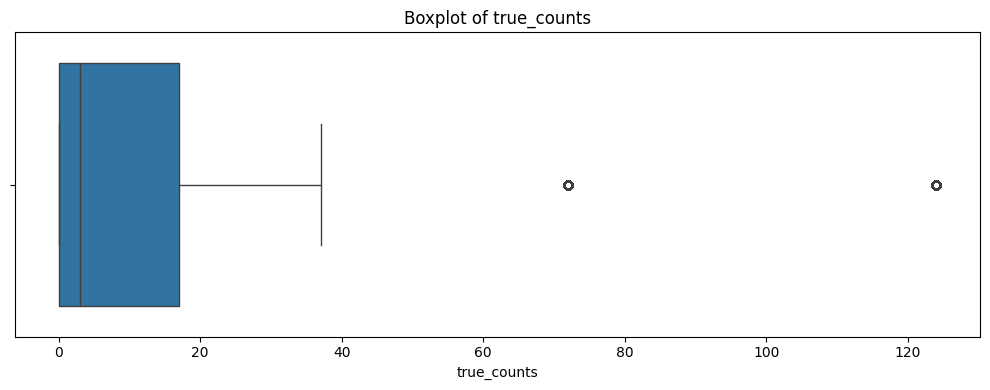

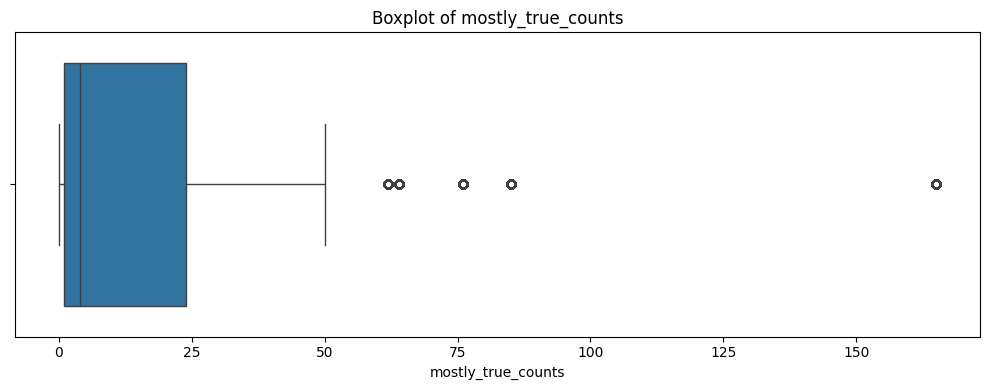

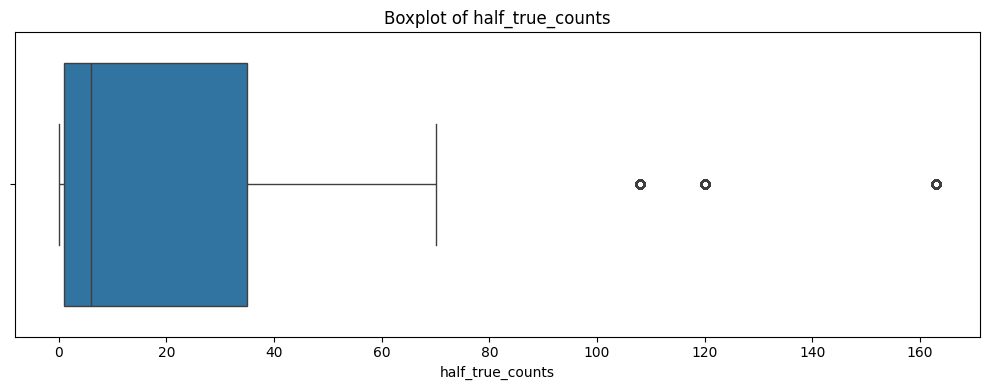

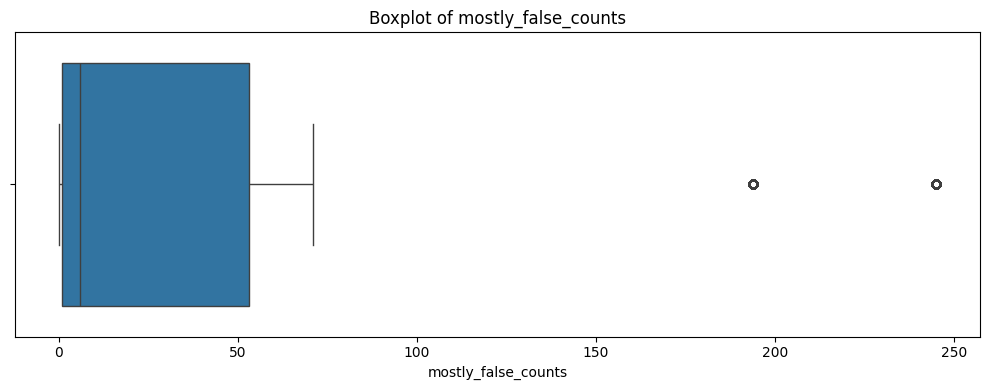

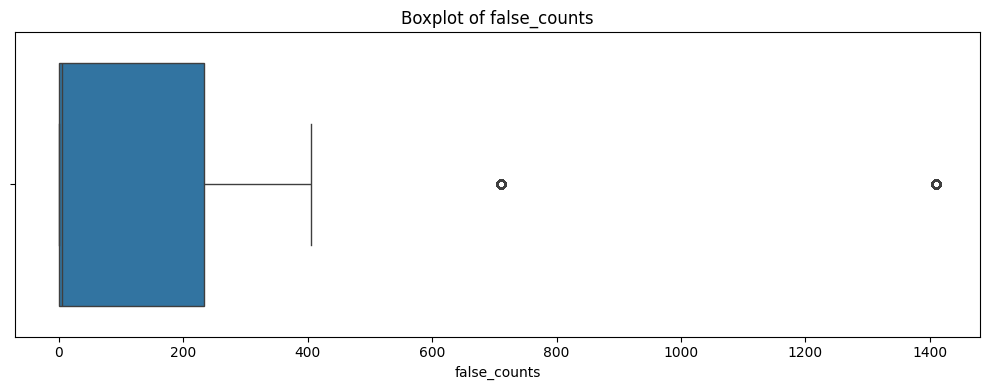

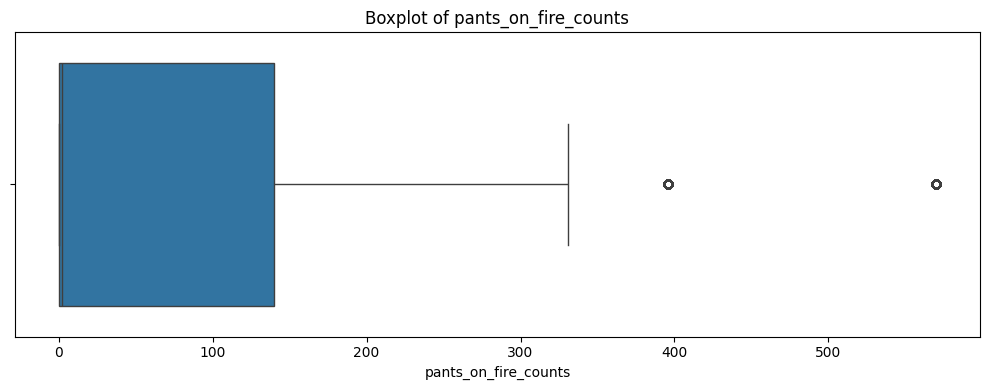

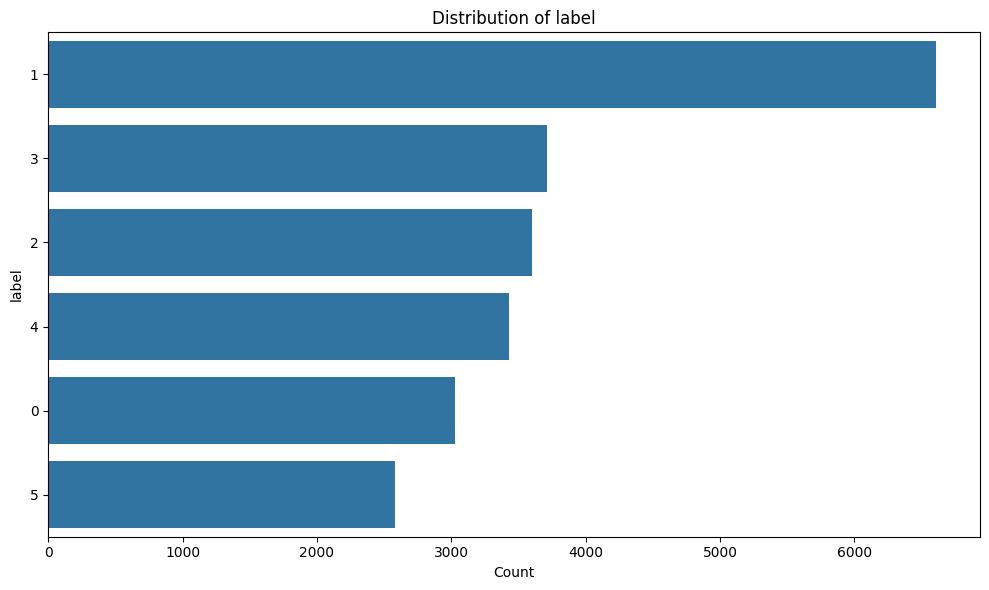

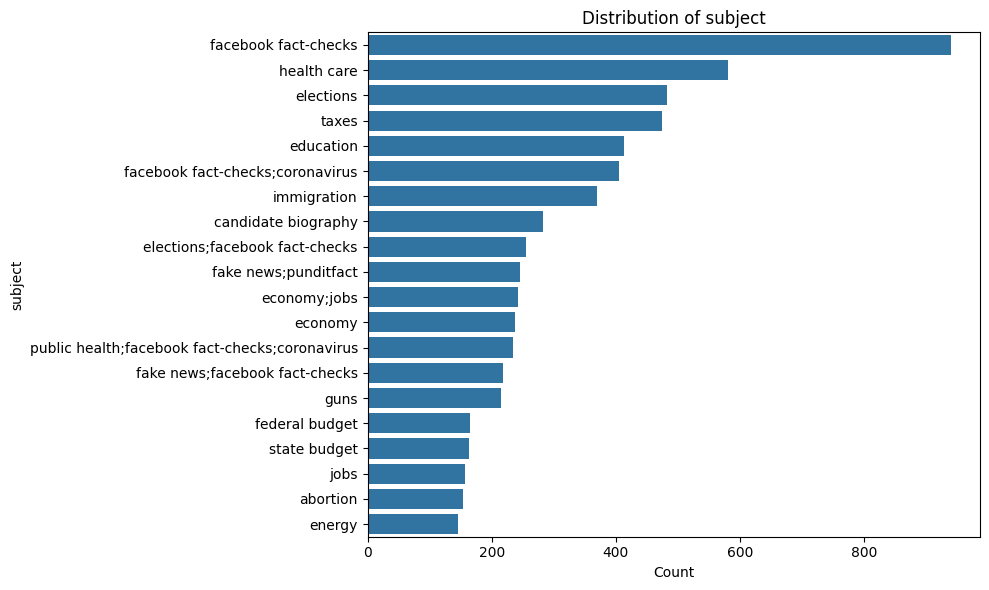

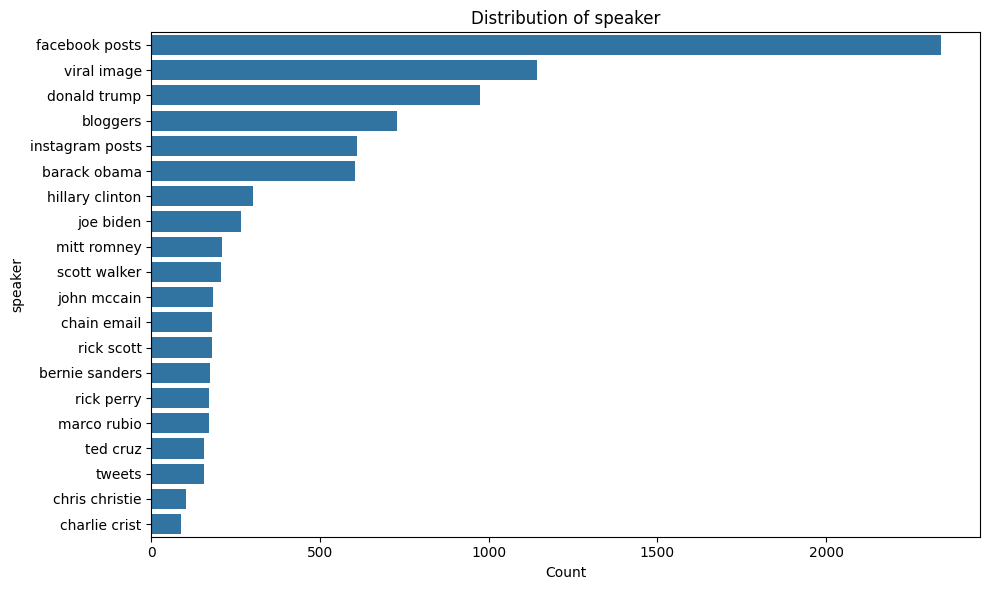

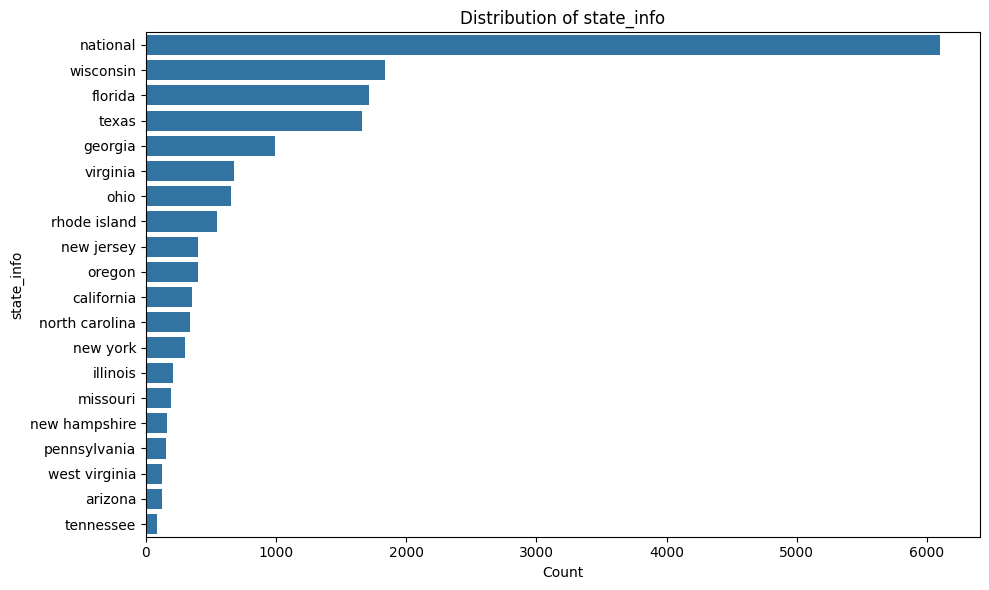

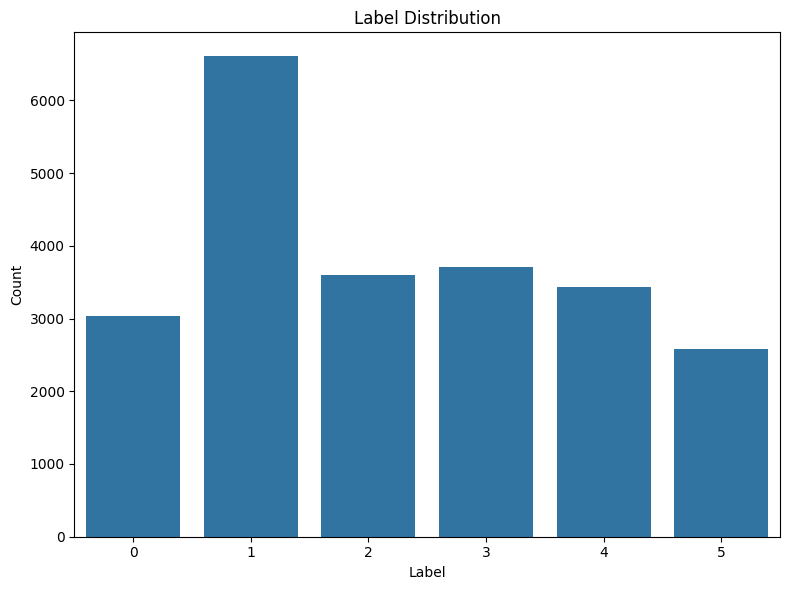

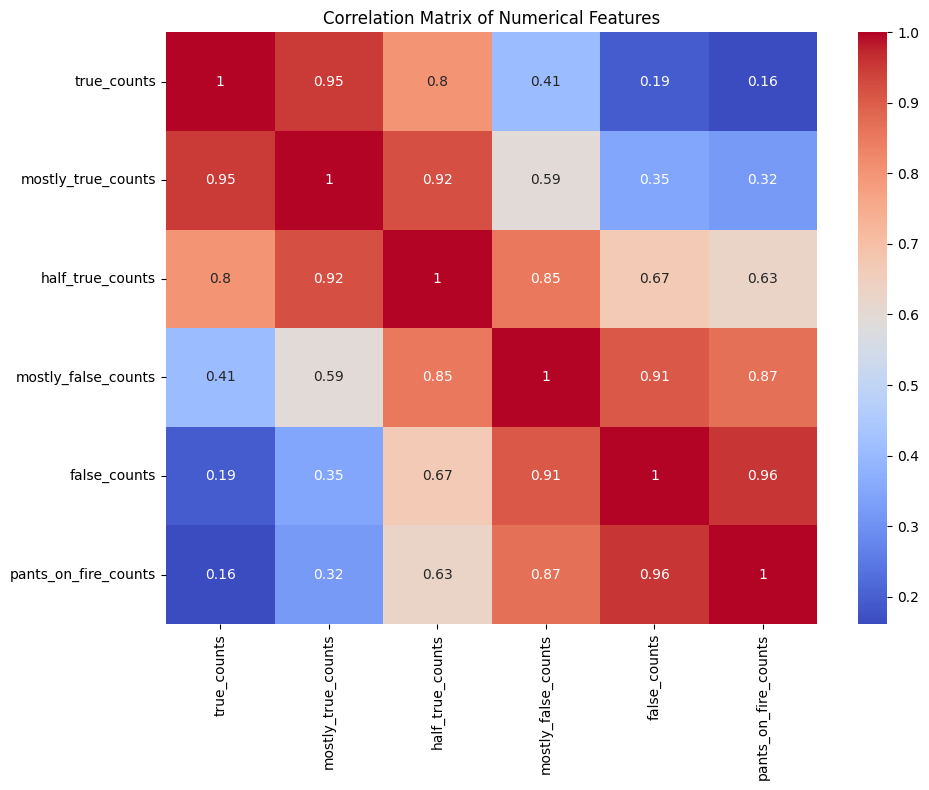

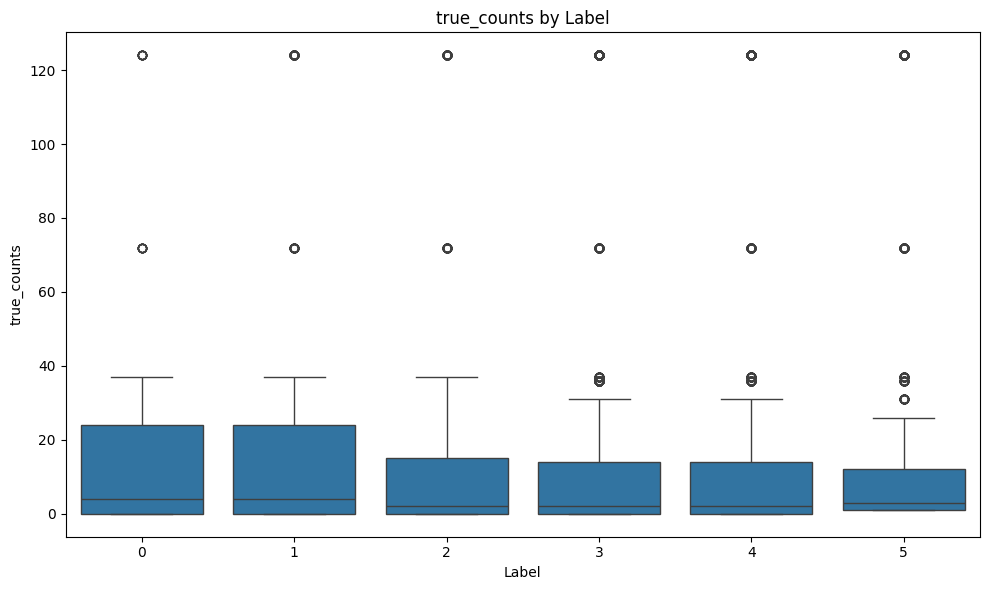

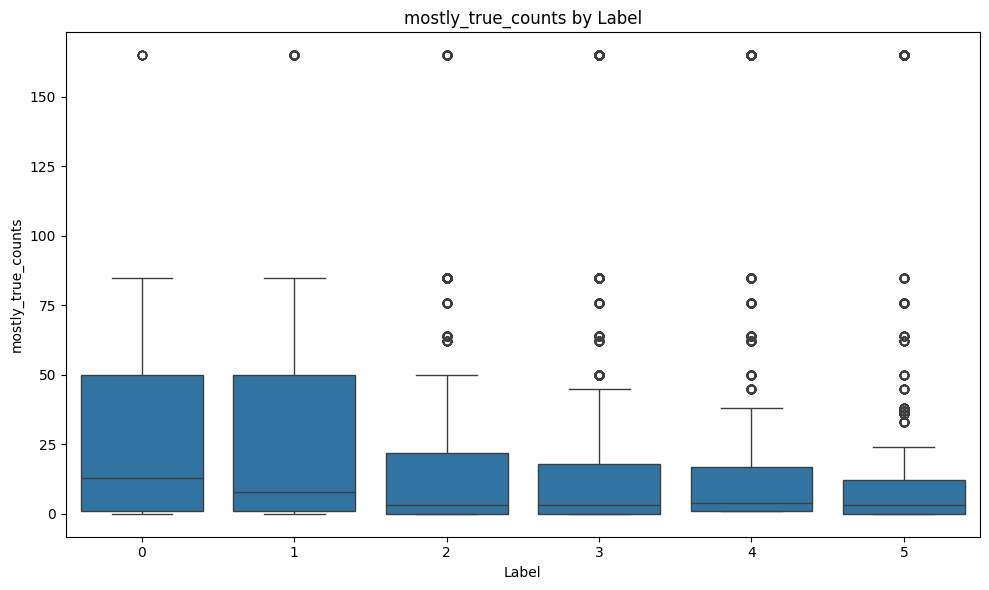

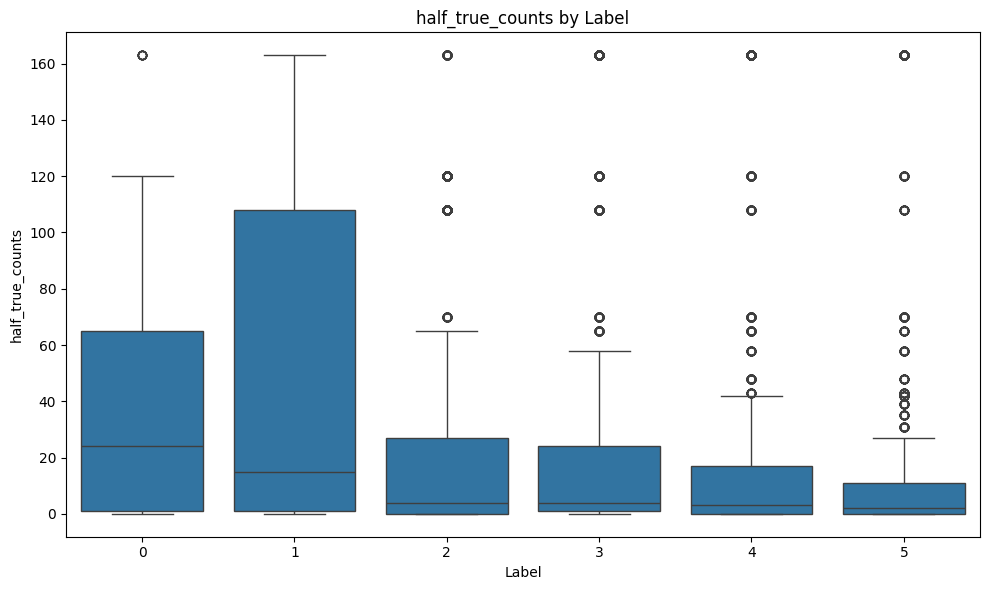

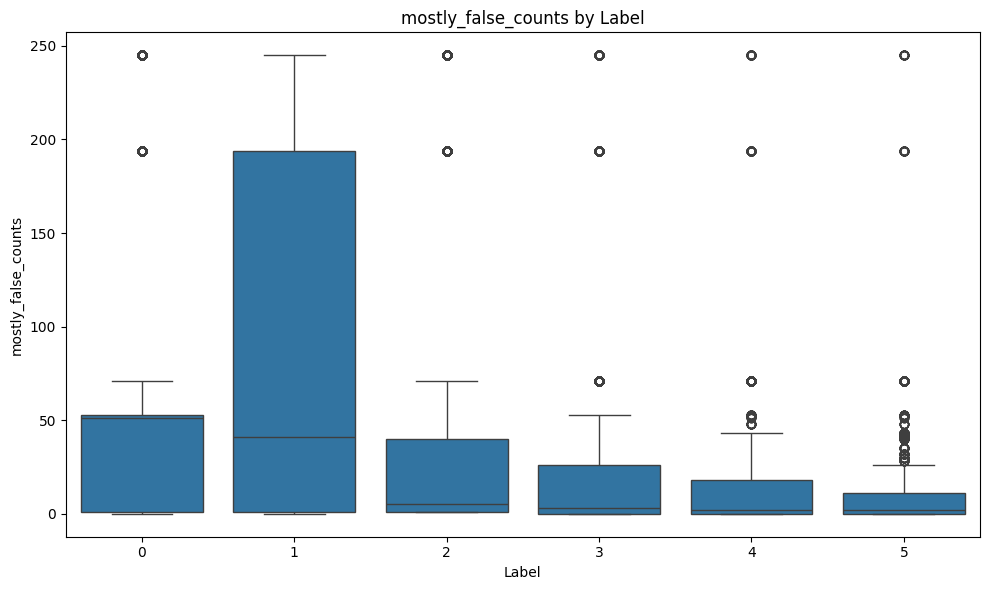

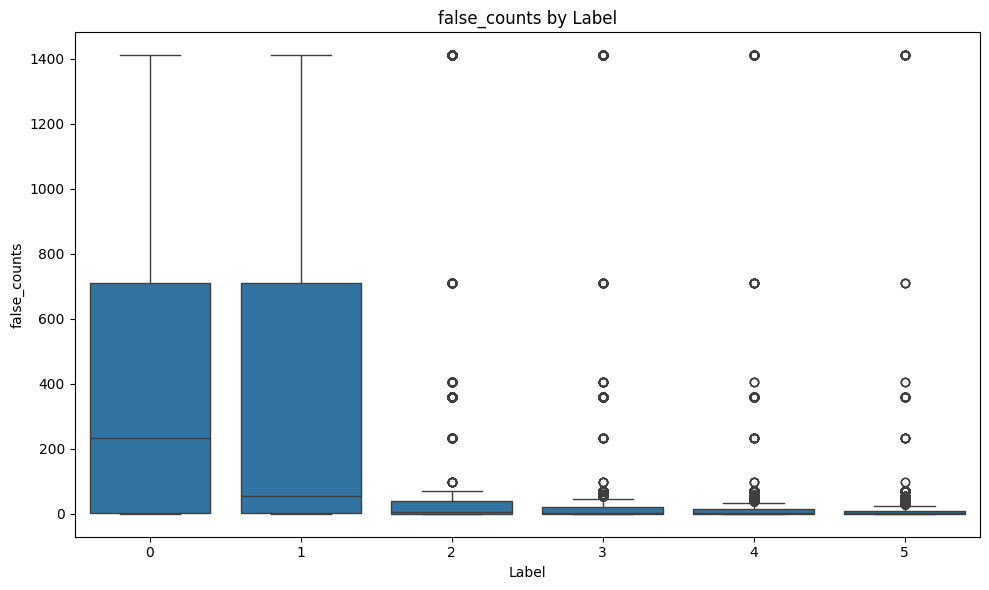

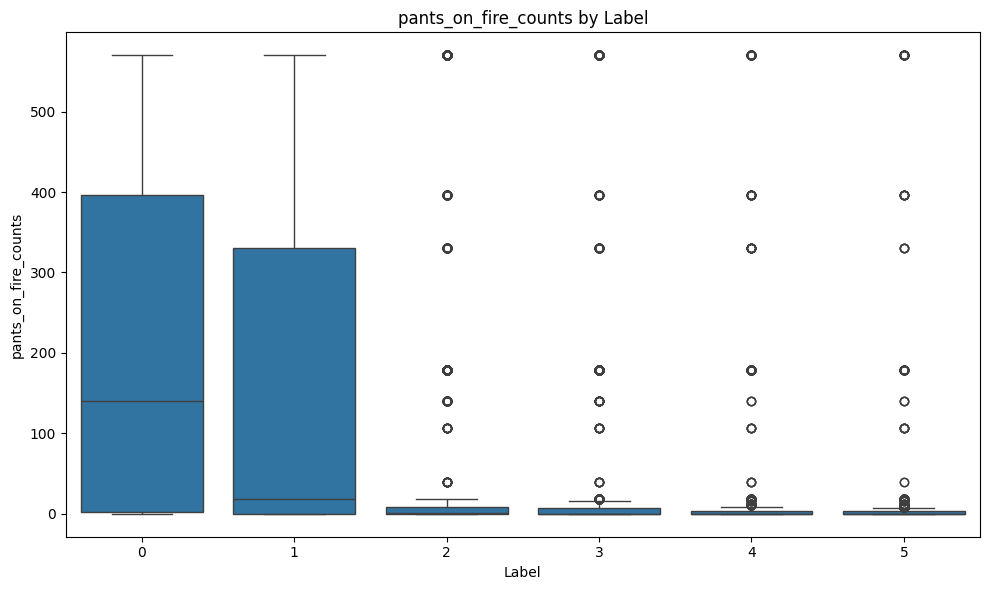

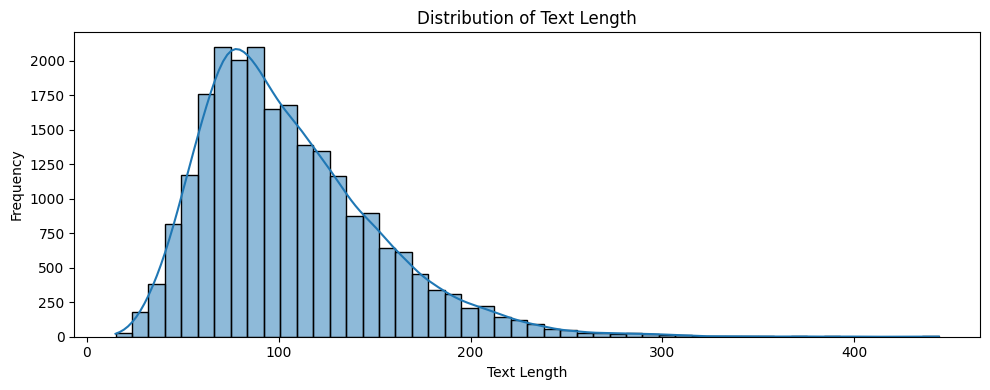

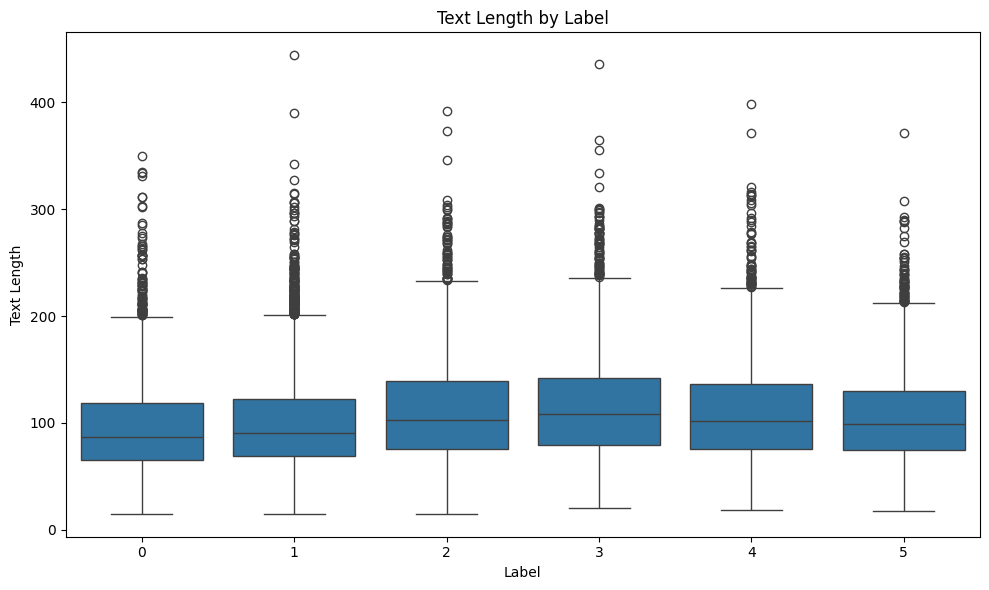

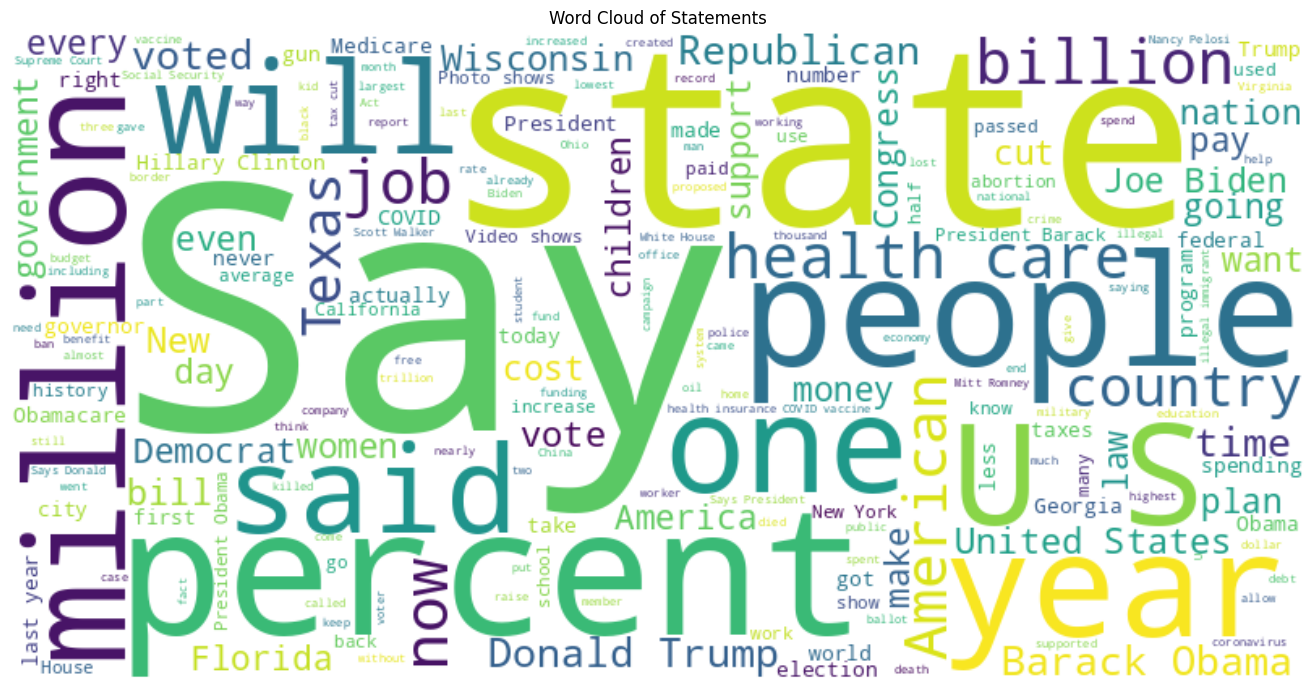

In [ ]:
pd.set_option('display.max_columns', None)   # Display all columns
pd.set_option('display.max_rows', None)      # Display all rows
pd.set_option('display.width', 1000)         # Adjust display width
pd.set_option('display.precision', 2)        # Set precision for floating-point numbers

data_df = pd.concat([train_df, val_df, test_df], ignore_index=True)


## First 5 Rows
print("First 5 Rows:")
display(data_df.head())

## Data Types
print("\nData Types:")
display(data_df.dtypes.to_frame(name='Data Type'))

## Summary Statistics
print("\nSummary Statistics:")
display(data_df.describe(include='all').transpose())

# Check for missing values
print("\nMissing Values:")
missing_values = data_df.isnull().sum()
missing_df = missing_values[missing_values > 0].to_frame(name='Missing Values')
display(missing_df)

# If you prefer to use tabulate for console output, uncomment the following lines:
print("First 5 Rows:")
print(tabulate(data_df.head(), headers='keys', tablefmt='psql'))

print("\nData Types:")
print(tabulate(data_df.dtypes.to_frame(name='Data Type'), headers='keys', tablefmt='psql'))

print("\nSummary Statistics:")
print(tabulate(data_df.describe(include='all').transpose(), headers='keys', tablefmt='psql'))

print("\nMissing Values:")
print(tabulate(missing_df, headers='keys', tablefmt='psql'))

# List of numerical and categorical features
numerical_features = [
    'true_counts',
    'mostly_true_counts',
    'half_true_counts',
    'mostly_false_counts',
    'false_counts',
    'pants_on_fire_counts'
]

categorical_features = ['label', 'subject', 'speaker', 'state_info']

# Exploratory Data Analysis

## Distribution of Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.histplot(data_df[feature].dropna(), bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

## Boxplots for Numerical Features
for feature in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data_df[feature].dropna())
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.tight_layout()
    plt.show()

## Distribution of Categorical Features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    # Get the top 20 categories
    order = data_df[feature].value_counts().iloc[:20].index
    sns.countplot(y=feature, data=data_df, order=order)
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Count')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

## Label Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data_df)
plt.title('Label Distribution')
plt.xlabel('Label')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Correlation Matrix
corr_matrix = data_df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# Relationship between Numerical Features and Label
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=data_df)
    plt.title(f'{feature} by Label')
    plt.xlabel('Label')
    plt.ylabel(feature)
    plt.tight_layout()
    plt.show()

# Text Length Analysis (if applicable)
if 'statement' in data_df.columns:
    # Calculate text length
    data_df['text_length'] = data_df['statement'].apply(lambda x: len(str(x)))

    # Distribution of Text Length
    plt.figure(figsize=(10, 4))
    sns.histplot(data_df['text_length'], bins=50, kde=True)
    plt.title('Distribution of Text Length')
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

    # Text Length by Label
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y='text_length', data=data_df)
    plt.title('Text Length by Label')
    plt.xlabel('Label')
    plt.ylabel('Text Length')
    plt.tight_layout()
    plt.show()

# Word Cloud of Statements (optional)
try:
    from wordcloud import WordCloud, STOPWORDS

    if 'statement' in data_df.columns:
        text = " ".join(str(statement) for statement in data_df['statement'].dropna())
        wordcloud = WordCloud(
            stopwords=STOPWORDS,
            background_color='white',
            width=800,
            height=400
        ).generate(text)

        plt.figure(figsize=(15, 7))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title('Word Cloud of Statements')
        plt.tight_layout()
        plt.show()
except ImportError:
    print("WordCloud library is not installed. Skipping word cloud visualization.")
    print("You can install it using 'pip install wordcloud'.")



Data Issues report


----- Missing Values Report -----

Columns with missing values:


,Missing Values
subject,207
speaker_description,10
state_info,5641
context,154


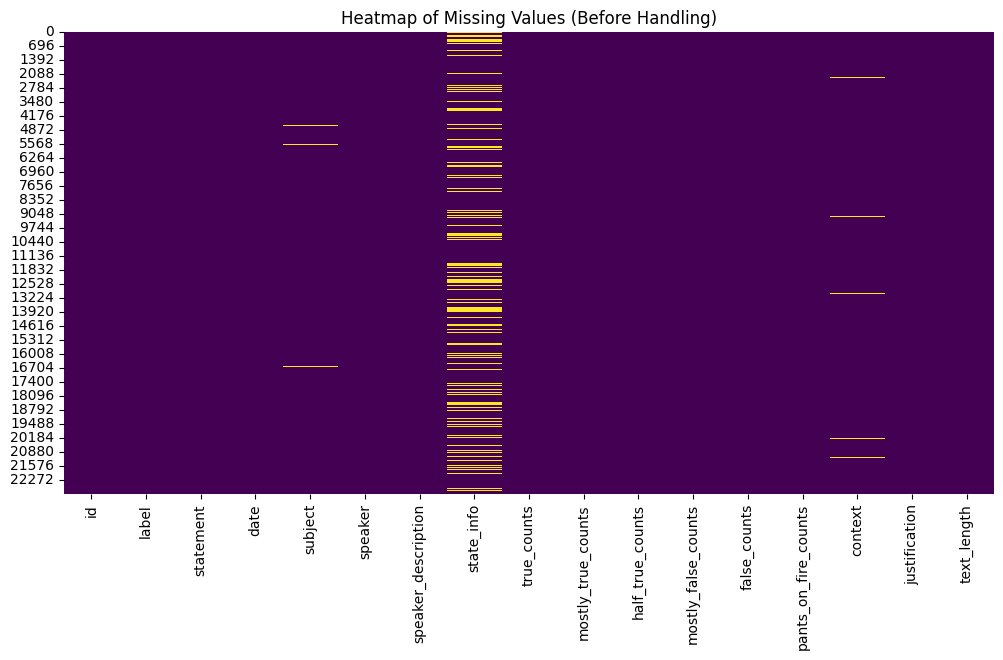


After handling missing values:


,Missing Values


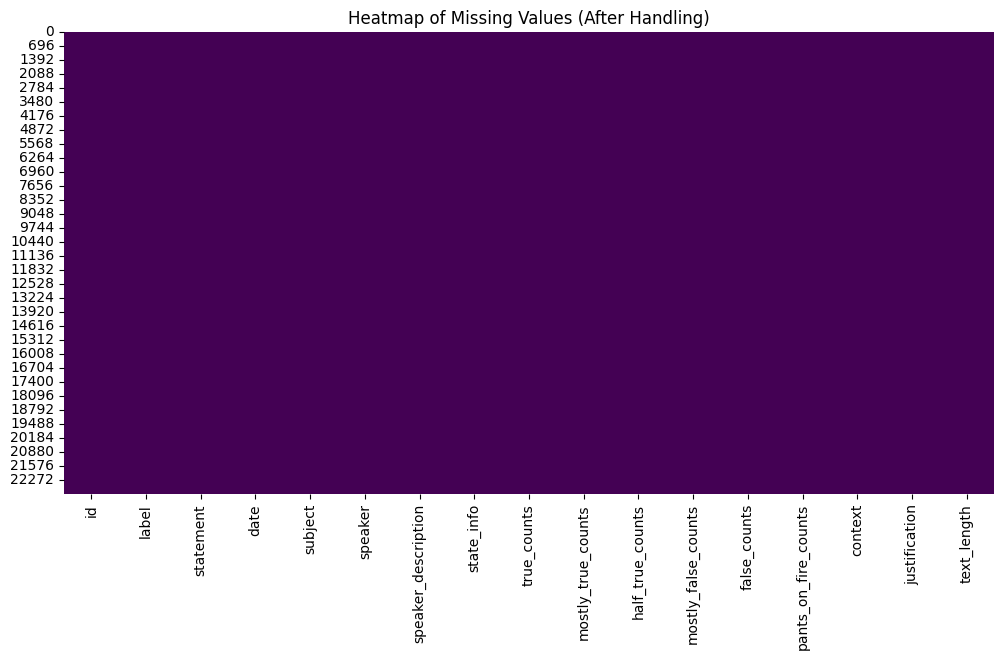


----- Duplicates Report -----

No duplicate rows found in the dataset.

----- Data Type Mismatches Report -----

Column 'id' data type matches expected 'int64'.
Column 'label' has data type 'int64' but expected 'object'. Attempting to convert...
Column 'label' converted to 'object'.
Column 'statement' data type matches expected 'object'.
Column 'date' has data type 'object' but expected 'datetime64[ns]'. Attempting to convert...
Column 'date' converted to 'datetime64[ns]'.
Column 'subject' data type matches expected 'object'.
Column 'speaker' data type matches expected 'object'.
Column 'speaker_description' data type matches expected 'object'.
Column 'state_info' data type matches expected 'object'.
Column 'context' data type matches expected 'object'.
Column 'justification' data type matches expected 'object'.

Data types after correction:


,Data Type
id,int64
label,object
statement,object
date,datetime64[ns]
subject,object
speaker,object
speaker_description,object
state_info,object
true_counts,int64
mostly_true_counts,int64



----- Data Cleaning Process Completed -----

Final cleaned dataset shape: (22962, 17)


In [ ]:
# Import necessary libraries

# Set pandas display options for better readability
pd.set_option('display.max_columns', None)   # Display all columns
pd.set_option('display.width', 1000)         # Adjust display width
pd.set_option('display.precision', 3)        # Set precision for floating-point numbers


# -------------------------
# 1. Identify and Handle Missing Values
# -------------------------

def report_and_handle_missing_values(df):
    print("\n----- Missing Values Report -----\n")
    missing_values = df.isnull().sum()
    missing_values = missing_values[missing_values > 0]
    if not missing_values.empty:
        print("Columns with missing values:")
        display(missing_values.to_frame(name='Missing Values'))

        # Visualize missing values before handling
        plt.figure(figsize=(12, 6))
        sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
        plt.title('Heatmap of Missing Values (Before Handling)')
        plt.show()

        # Handling missing values
        # Option 1: Drop rows with missing values
        # df_cleaned = df.dropna()

        # Option 2: Fill missing values with appropriate methods
        df_cleaned = df.copy()
        for col in missing_values.index:
            if df[col].dtype == 'object':
                df_cleaned[col] = df[col].fillna('Unknown')
            else:
                df_cleaned[col] = df[col].fillna(df[col].median())

        print("\nAfter handling missing values:")
        missing_values_after = df_cleaned.isnull().sum()
        display(missing_values_after[missing_values_after > 0].to_frame(name='Missing Values'))

        # Visualize missing values after handling
        plt.figure(figsize=(12, 6))
        sns.heatmap(df_cleaned.isnull(), cbar=False, cmap='viridis')
        plt.title('Heatmap of Missing Values (After Handling)')
        plt.show()

        return df_cleaned
    else:
        print("No missing values found in the dataset.")
        return df

# -------------------------
# 3. Identify and Handle Duplicates
# -------------------------

def report_and_handle_duplicates(df):
    print("\n----- Duplicates Report -----\n")
    duplicate_rows = df[df.duplicated()]
    if not duplicate_rows.empty:
        print(f"Number of duplicate rows: {duplicate_rows.shape[0]}")
        print("\nDuplicate rows (first 5):")
        display(duplicate_rows.head())

        # Handling duplicates by dropping them
        df_cleaned = df.drop_duplicates()
        print(f"\nAfter removing duplicates, new dataset shape: {df_cleaned.shape}")
        return df_cleaned
    else:
        print("No duplicate rows found in the dataset.")
        return df

# -------------------------
# 5. Identify and Correct Data Type Mismatches
# -------------------------

def report_and_correct_datatype_mismatches(df):
    print("\n----- Data Type Mismatches Report -----\n")
    # Expected data types (adjust according to your dataset)
    expected_dtypes = {
        'id': 'int64',
        'label': 'object',
        'statement': 'object',
        'date': 'datetime64[ns]',
        'subject': 'object',
        'speaker': 'object',
        'speaker_description': 'object',
        'state_info': 'object',
        'context': 'object',
        'justification': 'object'
    }

    df_cleaned = df.copy()

    # Correct data types
    for col, expected_dtype in expected_dtypes.items():
        if col in df.columns:
            actual_dtype = df[col].dtype
            if actual_dtype != expected_dtype:
                print(f"Column '{col}' has data type '{actual_dtype}' but expected '{expected_dtype}'. Attempting to convert...")
                try:
                    if expected_dtype == 'datetime64[ns]':
                        df_cleaned[col] = pd.to_datetime(df[col], errors='coerce')
                    else:
                        df_cleaned[col] = df[col].astype(expected_dtype)
                    print(f"Column '{col}' converted to '{expected_dtype}'.")
                except Exception as e:
                    print(f"Failed to convert column '{col}': {e}")
            else:
                print(f"Column '{col}' data type matches expected '{expected_dtype}'.")
        else:
            print(f"Column '{col}' not found in the dataset.")

    # Display data types after correction
    print("\nData types after correction:")
    display(df_cleaned.dtypes.to_frame(name='Data Type'))
    return df_cleaned

# -------------------------
# Run All Reports and Cleaning Steps
# -------------------------

def run_data_cleaning_process(df):
    # Step 1: Handle Missing Values
    df_cleaned = report_and_handle_missing_values(df)

    # Step 3: Handle Duplicates
    df_cleaned = report_and_handle_duplicates(df_cleaned)

    # Step 5: Correct Data Type Mismatches
    df_cleaned = report_and_correct_datatype_mismatches(df_cleaned)

    print("\n----- Data Cleaning Process Completed -----\n")
    print("Final cleaned dataset shape:", df_cleaned.shape)
    return df_cleaned

cleaned_data_df = run_data_cleaning_process(data_df)


Random forest test

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



----- Using TF-IDF Vectorization -----
Accuracy Score: 0.5131837001525387

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.26      0.38       605
           1       0.46      0.80      0.58      1338
           2       0.74      0.38      0.51       696
           3       0.59      0.48      0.53       766
           4       0.52      0.48      0.50       664
           5       0.42      0.32      0.36       520

    accuracy                           0.51      4589
   macro avg       0.56      0.46      0.48      4589
weighted avg       0.55      0.51      0.50      4589


Top 20 Most Important Features:
                 feature  importance
0                   year       0.011
1470             element       0.011
3232           partially       0.010
811        clarification       0.009
1108            critical       0.008
42              accurate       0.007
2554              leaves       0.007
3674                rate     

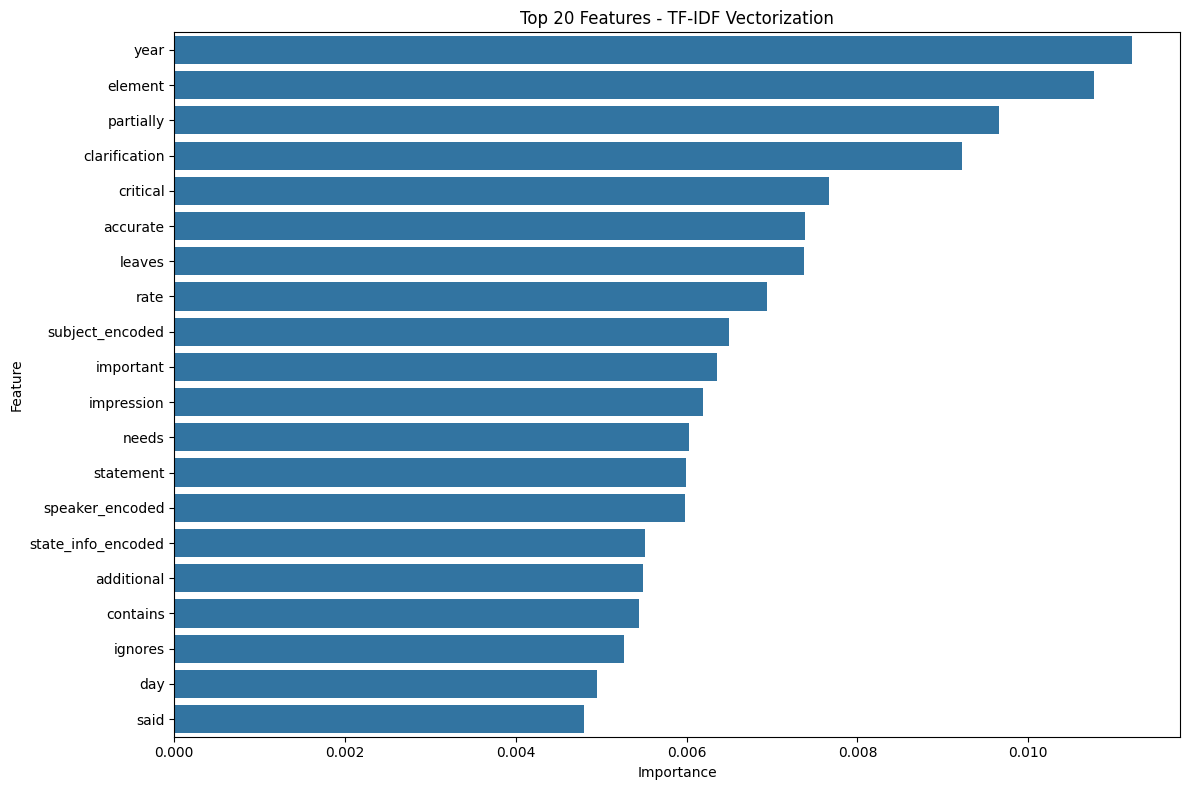


----- Using Count Vectorization with n-grams -----
Accuracy Score: 0.5232076705164523

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.27      0.38       605
           1       0.46      0.82      0.59      1338
           2       0.78      0.39      0.52       696
           3       0.64      0.48      0.54       766
           4       0.55      0.49      0.52       664
           5       0.39      0.36      0.38       520

    accuracy                           0.52      4589
   macro avg       0.58      0.47      0.49      4589
weighted avg       0.57      0.52      0.51      4589


Top 20 Most Important Features:
                     feature  importance
0                       year       0.012
3070      partially accurate       0.008
3            subject_encoded       0.007
3069               partially       0.006
758            clarification       0.006
2                        day       0.006
1402                 eleme

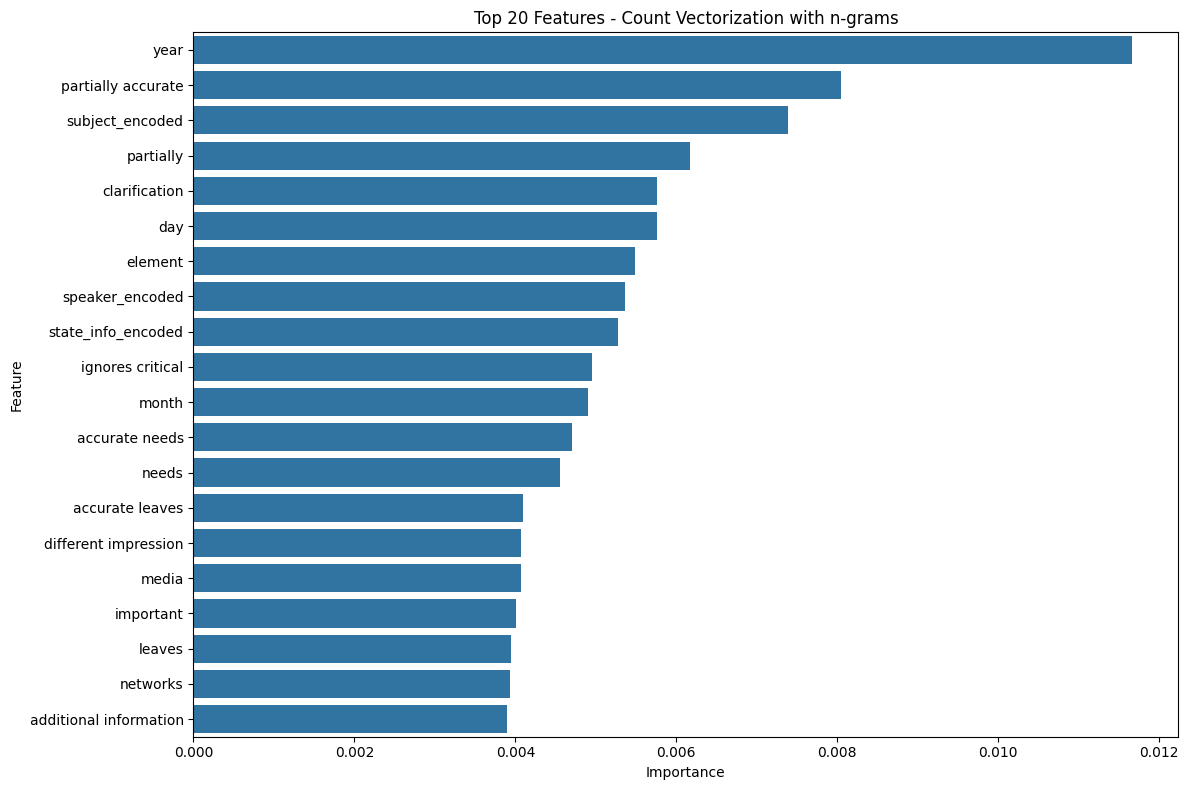


----- Using Word2Vec Embeddings -----
Accuracy Score: 0.4131619089126171

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.26      0.36       605
           1       0.46      0.67      0.54      1338
           2       0.41      0.32      0.36       696
           3       0.35      0.35      0.35       766
           4       0.31      0.36      0.33       664
           5       0.38      0.22      0.28       520

    accuracy                           0.41      4589
   macro avg       0.42      0.36      0.37      4589
weighted avg       0.42      0.41      0.40      4589


----- Performance Comparison -----
TF-IDF: 0.5132
CountVectorizer: 0.5232
Word2Vec: 0.4132


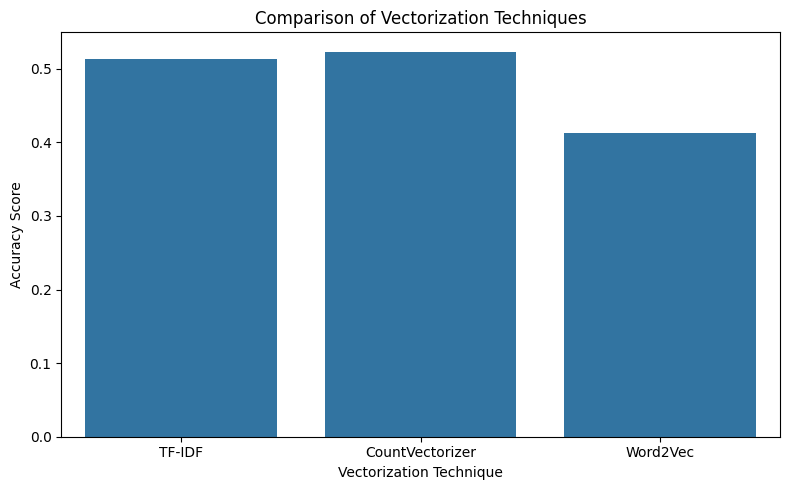

In [ ]:

# -------------------------
# 1. Select Specified Columns
# -------------------------

columns_to_use = [
    'label',
    'statement',
    'date',
    'subject',
    'speaker',
    'speaker_description',
    'state_info',
    'context',
    'justification'
]
data_df = cleaned_data_df[columns_to_use]

# -------------------------
# 2. Handle Missing Values and Data Cleaning
# -------------------------

# Fill missing values
data_df['subject'] = data_df['subject'].fillna('World')
data_df['context'] = data_df['context'].fillna('Unknown')
data_df['speaker_description'] = data_df['speaker_description'].fillna('No Description')
data_df['state_info'] = data_df['state_info'].fillna('Unknown')

# Convert 'state_info' to lowercase and replace 'national' with 'USA'
data_df['state_info'] = data_df['state_info'].str.lower()
data_df['state_info'] = data_df['state_info'].str.replace('national', 'USA', case=False)

# Remove duplicate rows
data_df = data_df.drop_duplicates()

# -------------------------
# 3. Text Preprocessing Function
# -------------------------

# Download NLTK data (if not already downloaded)
import nltk
nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and numbers
    text = re.sub(r'[^a-z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a string
    preprocessed_text = ' '.join(tokens)
    return preprocessed_text

# Apply text preprocessing to all text features
text_features = ['statement', 'speaker_description', 'context', 'justification']
for feature in text_features:
    data_df[feature] = data_df[feature].astype(str).apply(preprocess_text)

# Combine text features for vectorization
data_df['text_combined'] = data_df[text_features].apply(lambda x: ' '.join(x), axis=1)

# -------------------------
# 4. Encode Categorical Variables
# -------------------------

# Encode target variable 'label'
label_encoder = LabelEncoder()
data_df['label_encoded'] = label_encoder.fit_transform(data_df['label'])

# Process date feature
data_df['date'] = pd.to_datetime(data_df['date'], errors='coerce')
data_df['date'] = data_df['date'].fillna(pd.Timestamp('1900-01-01'))

# Extract date features
data_df['year'] = data_df['date'].dt.year
data_df['month'] = data_df['date'].dt.month
data_df['day'] = data_df['date'].dt.day

# Encode categorical features using Label Encoding
categorical_features = ['subject', 'speaker', 'state_info']

for col in categorical_features:
    data_df[col] = data_df[col].astype(str)
    data_df[col] = data_df[col].fillna('Unknown')
    lbl_enc = LabelEncoder()
    data_df[col + '_encoded'] = lbl_enc.fit_transform(data_df[col])

# -------------------------
# 5. Prepare Feature Matrix and Target Vector
# -------------------------

# Features to include
feature_columns = ['year', 'month', 'day', 'subject_encoded', 'speaker_encoded', 'state_info_encoded']
X_numerical = data_df[feature_columns].values

# Target variable
y = data_df['label_encoded']

# -------------------------
# 6. Define a Function to Train, Evaluate Models, and Extract Feature Importances
# -------------------------

def train_evaluate_model(X_text, vectorizer_name, vectorizer=None):
    print(f"\n----- Using {vectorizer_name} -----")
    # Combine numerical and text features
    X = hstack([X_numerical, X_text])

    # Split Data into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # Evaluate the Model
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy Score:", accuracy)
    print("\nClassification Report:")
    target_names = [str(label) for label in label_encoder.classes_]
    print(classification_report(y_test, y_pred, target_names=target_names))

    # Extract and display feature importances (only if vectorizer is provided)
    if vectorizer is not None:
        # Get feature names
        numerical_feature_names = feature_columns
        text_feature_names = vectorizer.get_feature_names_out()
        all_feature_names = numerical_feature_names + list(text_feature_names)

        # Extract feature importances
        importances = rf_classifier.feature_importances_

        # Create DataFrame for feature importances
        feature_importances = pd.DataFrame({
            'feature': all_feature_names,
            'importance': importances
        })

        # Sort features by importance
        feature_importances = feature_importances.sort_values(by='importance', ascending=False)

        # Display top 20 features
        print("\nTop 20 Most Important Features:")
        print(feature_importances.head(20))

        # Visualize the top 20 features
        plt.figure(figsize=(12, 8))
        sns.barplot(x='importance', y='feature', data=feature_importances.head(20))
        plt.title(f'Top 20 Features - {vectorizer_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.tight_layout()
        plt.show()

    return accuracy

# -------------------------
# 7. Vectorization Techniques and Performance Comparison
# -------------------------

# Initialize an empty dictionary to store accuracies
vectorizer_performance = {}

# --- Technique 1: TF-IDF Vectorization ---
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
text_tfidf = tfidf_vectorizer.fit_transform(data_df['text_combined'])

accuracy_tfidf = train_evaluate_model(text_tfidf, "TF-IDF Vectorization", vectorizer=tfidf_vectorizer)
vectorizer_performance['TF-IDF'] = accuracy_tfidf

# --- Technique 2: Count Vectorization with n-grams ---
count_vectorizer = CountVectorizer(max_features=5000, ngram_range=(1,2))
text_counts = count_vectorizer.fit_transform(data_df['text_combined'])

accuracy_count = train_evaluate_model(text_counts, "Count Vectorization with n-grams", vectorizer=count_vectorizer)
vectorizer_performance['CountVectorizer'] = accuracy_count

# --- Technique 3: Word Embeddings using Word2Vec ---

# Prepare data for Word2Vec
sentences = data_df['text_combined'].apply(lambda x: x.split())

# Train Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=100, window=5, min_count=2, workers=4)

# Function to get average Word2Vec embeddings for each document
def get_word2vec_embeddings(sentences, model, num_features):
    embeddings = np.zeros((len(sentences), num_features))
    index2word_set = set(model.wv.index_to_key)
    for i, sentence in enumerate(sentences):
        nwords = 0
        feature_vec = np.zeros((num_features,), dtype='float32')
        for word in sentence:
            if word in index2word_set:
                nwords += 1
                feature_vec = np.add(feature_vec, model.wv[word])
        if nwords > 0:
            embeddings[i] = feature_vec / nwords
    return embeddings

# Get embeddings
text_embeddings = get_word2vec_embeddings(sentences, word2vec_model, 100)

# Convert numerical features to sparse matrix for compatibility
from scipy import sparse
X_numerical_sparse = sparse.csr_matrix(X_numerical)

# Combine numerical and embedding features
X_embeddings = np.hstack((X_numerical_sparse.toarray(), text_embeddings))

# Split Data into Training and Testing Sets
X_train_emb, X_test_emb, y_train_emb, y_test_emb = train_test_split(X_embeddings, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
print("\n----- Using Word2Vec Embeddings -----")
rf_classifier_emb = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_emb.fit(X_train_emb, y_train_emb)

# Evaluate the Model
y_pred_emb = rf_classifier_emb.predict(X_test_emb)
accuracy_emb = accuracy_score(y_test_emb, y_pred_emb)
print("Accuracy Score:", accuracy_emb)
print("\nClassification Report:")
target_names = [str(label) for label in label_encoder.classes_]
print(classification_report(y_test_emb, y_pred_emb, target_names=target_names))

vectorizer_performance['Word2Vec'] = accuracy_emb

# Note: Feature importances for Word2Vec embeddings are not directly interpretable

# -------------------------
# 8. Compare Vectorization Techniques
# -------------------------

# Print the performance comparison
print("\n----- Performance Comparison -----")
for vectorizer, accuracy in vectorizer_performance.items():
    print(f"{vectorizer}: {accuracy:.4f}")

# Visualize the performance comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(vectorizer_performance.keys()), y=list(vectorizer_performance.values()))
plt.title('Comparison of Vectorization Techniques')
plt.ylabel('Accuracy Score')
plt.xlabel('Vectorization Technique')
plt.tight_layout()
plt.show()
